In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
urls = {'year':[],'url':[]}

for year in range(1980,2024):
    url = f'https://www.procyclingstats.com/statistics.php?season={year}&level=1&mw=2&filter=Filter&p=teams&s=youngest-teams'
    urls['year'] += [year]
    urls['url'] += [url]

In [3]:
urls

{'year': [1980,
  1981,
  1982,
  1983,
  1984,
  1985,
  1986,
  1987,
  1988,
  1989,
  1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020,
  2021,
  2022,
  2023],
 'url': ['https://www.procyclingstats.com/statistics.php?season=1980&level=1&mw=2&filter=Filter&p=teams&s=youngest-teams',
  'https://www.procyclingstats.com/statistics.php?season=1981&level=1&mw=2&filter=Filter&p=teams&s=youngest-teams',
  'https://www.procyclingstats.com/statistics.php?season=1982&level=1&mw=2&filter=Filter&p=teams&s=youngest-teams',
  'https://www.procyclingstats.com/statistics.php?season=1983&level=1&mw=2&filter=Filter&p=teams&s=youngest-teams',
  'https://www.procyclingstats.com/statistics.php?season=1984&level=1&mw=2&filter=Filter&p=teams&s=youngest-teams',
  'https://www.procyclingstats.com/statistics.php?se

In [4]:
df_list = list()

for item in urls['url']:
    page = requests.get(item)
    data = pd.read_html(page.text)[0]
    df_list.append(data)
    
len(df_list)

44

In [5]:
df = pd.concat(df_list)

In [6]:
df.Season.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 0 to 14
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #            524 non-null    object 
 1   Season       524 non-null    object 
 2   Team         524 non-null    object 
 3   Class        493 non-null    object 
 4   Average age  524 non-null    float64
dtypes: float64(1), object(4)
memory usage: 24.6+ KB


In [8]:
df = df.drop(columns=['#']).rename(columns={'Average age':'avg_age'})

In [9]:
df.tail(10)

,Season,Team,Class,avg_age
5,2023,Canyon//SRAM Racing,WTW,25.5
6,2023,Team SD Worx,WTW,25.9
7,2023,Israel Premier Tech Roland,WTW,25.9
8,2023,UAE Team ADQ,WTW,25.9
9,2023,FDJ - SUEZ,WTW,25.9
10,2023,Liv Racing TeqFind,WTW,26.5
11,2023,Team Jayco AlUla,WTW,27.1
12,2023,Movistar Team,WTW,27.5
13,2023,EF Education-TIBCO-SVB,WTW,27.6
14,2023,Trek - Segafredo,WTW,28.6


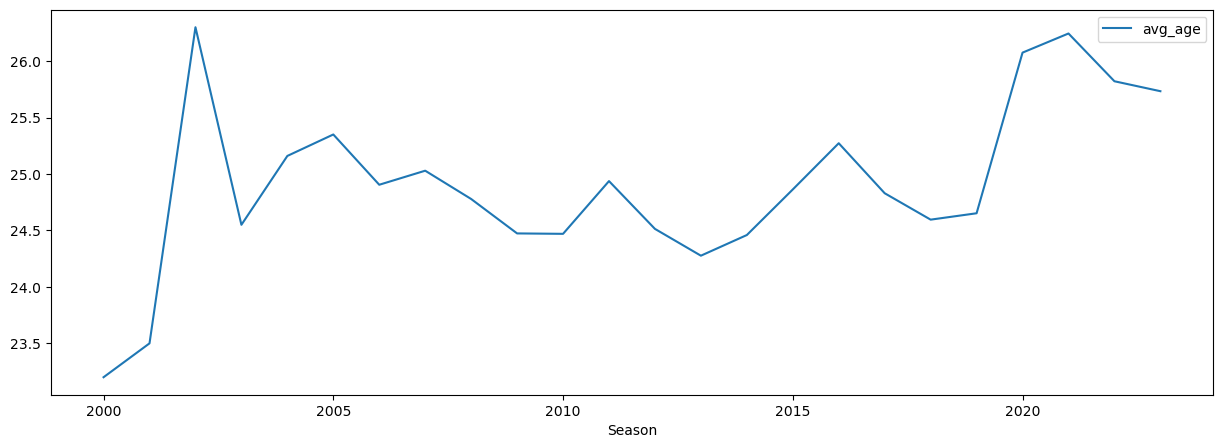

In [10]:
average_df = df.groupby('Season').agg({'avg_age':'mean'})

average_df.plot(kind='line',figsize=(15,5))
plt.show()

In [11]:
average_df[30:]

,avg_age
Season,


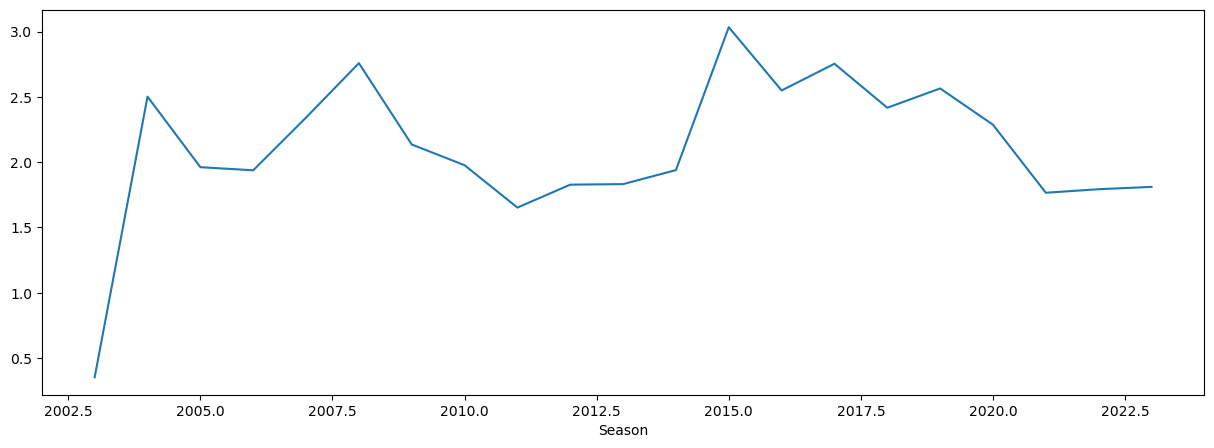

In [12]:
std_df = df.groupby(by=['Season'])['avg_age'].std()

std_df.plot(kind='line',figsize=(15,5))
plt.show()

In [13]:
df['avg_age'].max()

34.7

In [14]:
df.query('1997 < Season < 1999')

,Season,Team,Class,avg_age
